```{include} ../math-definitions.md
```

In [1]:
from bccr import SW
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from statsmodels.tsa.api import VAR
import statsmodels.api as sm

from itertools import permutations

# Pronósticos con VAR

Recordemos que
\begin{equation*}
\hat{Y}_{t+s} = \xi_{t+s} + \Phi\xi_{t+s-1} +\dots+ \Phi^{s-1}\xi_{t+1} + \Phi^{s}\hat{Y}_{t}
\end{equation*}

Suponga que $\Phi$ ha sido estimado con datos hasta $t=T$.

El mejor pronóstico del sistema $s$ períodos adelante es
\begin{equation*}
\E\left[\hat{Y}_{T+s}\;|\; \hat{Y}_{T}\right]= \Phi^{s}\hat{Y}_{T}
\end{equation*}

El error de pronóstico es
\begin{equation*}
\hat{Y}_{T+s} - \E\left[\hat{Y}_{T+s}\;|\; \hat{Y}_{T}\right]= \xi_{t+s} + \Phi\xi_{t+s-1} +\dots+ \Phi^{s-1}\xi_{t+1}
\end{equation*}

y su varianza  (MSPE) es
\begin{equation*}
\Var\left[\hat{Y}_{T+s}\;|\; \hat{Y}_{T}\right] = \Omega + \Phi\Omega\Phi' +\dots+ \Phi^{s-1}\Omega{\Phi'}^{s-1}
\end{equation*}


## Pronósticos de largo plazo con VAR
Partiendo de
\begin{equation*}
\E\left[\hat{Y}_{T+s}\;|\; \hat{Y}_{T}\right]= \Phi^{s}\hat{Y}_{T}
\end{equation*}

recordamos que:
-  $\hat{y}_t\equiv y_t-\mu$
-  si el VAR es estacionario, $\lim\limits_{s\to\infty}\Phi^s = 0$.

Entonces el pronóstico de largo plazo
\begin{equation*}
\lim\limits_{s\to\infty}\E\left[Y_{T+s} - \mathbf{\mu} \;|\; \hat{Y}_{T}\right]= \lim\limits_{s\to\infty}\Phi^{s}\hat{Y}_{T} = 0
\end{equation*}

es decir
\begin{equation*}
\lim\limits_{s\to\infty}\E\left[y_{T+s} \;|\; \hat{Y}_{T}\right]= \mu
\end{equation*}

en el largo plazo el VAR volverá a su equilibrio estacionario.

## Descomposición de la varianza del shock reducido

Recuerde que los errores reducidos están relacionados con los estructurales por $\epsilon_t = \Gamma_0^{-1}\varepsilon_t$.

Sea $\Gamma_0^{-1} \equiv A =\MAT{a_1&\dots&a_n}$, con $a_i$ la $i$-ésima columna de $i$.

Entonces
\begin{align*}
\epsilon_t &= a_1\varepsilon_{1t} + a_2\varepsilon_{2t} + \dots + a_n\varepsilon_{nt} \\
\Omega = \E[\epsilon_t\epsilon'_t] &= \sigma_1^2 a_1a'_1 + \sigma_2^2 a_2a'_2 +\dots +\sigma_n^2 a_na'_n \\
&= \sum_{j=1}^{n} \sigma_j^2 a_ja'_j
\end{align*}

{{ empieza_ejemplo }}  {Descomposición de $\Omega$} {{ fin_titulo_ejemplo }}


Tomando $\Omega$ del ejemplo al inicio de este capítulo

\begin{equation*}
\begin{aligned}
\Omega = \MAT{1 & 0.5 & -1 \\ 0.5 & 4.25 & 2.5\\ -1 &  2.5 & 12.25}
&=\simbolo{\MAT{1 & 0 & 0\\ 0.5 & 1 & 0\\-1 & 0.75 & 1}}{\Gamma_0^{-1}}
\simbolo{\MAT{1 & 0 & 0\\ 0 & 4 & 0 \\0 & 0 & 9}}{\Sigma}
\simbolo{\MAT{1 & 0.5 & -1\\ 0 & 1 & 0.75 \\0 & 0 & 1}}{{\Gamma'}_0^{-1}}
\end{aligned}
\end{equation*}
Entonces $a'_1 = \MAT{1 & 0.5 & -1}$, $a'_2 = \MAT{0 & 1 & 0.75}$, $a'_3 = \MAT{0 & 0 & 1}$ y
\begin{align*}
\Omega &= 1 \MAT{1 \\ 0.5 \\ -1}\MAT{1 & 0.5 & -1} + 4\MAT{0 \\ 1 \\ 0.75}\MAT{0 & 1 & 0.75} + 9\MAT{0 \\ 0 \\ 1}\MAT{0 & 0 & 1} \\
&= \simbolo{1}{\sigma_1^2}\simbolo{\MAT{1 &0.5 & -1\\ 0.5&0.25& -0.5\\-1&-0.5&1}}{a_1a'_1} +
\simbolo{4}{\sigma_2^2}\simbolo{\MAT{0&0&0\\ 0&1&0.75\\ 0&0.75& 0.5625}}{a_2a'_2} + \simbolo{9}{\sigma_3^2}\simbolo{\MAT{0&0&0\\0&0&0\\0&0&1}}{a_3a'_3}
\end{align*}

Observe que **esta descomposición depende del ordenamiento de las variables**.
{{ termina_ejemplo }}



## Descomposición de la varianza del pronóstico

Sustituyendo $\Omega = \sum_{j=1}^{n} \sigma_j^2 a_ja'_j$ en $\Var\left[\hat{Y}_{T+s}\;|\; \hat{Y}_{T}\right] $ tenemos
\begin{multline*}
\Var\left[\hat{Y}_{T+s}\;|\; \hat{Y}_{T}\right] = \\
\sum_{j=1}^{n} \sigma_j^2 \left\{a_ja'_j + \Phi a_ja'_j\Phi' + \dots + \Phi^{s-1}a_ja'_j{\Phi'}^{s-1} \right\}
\end{multline*}

Con esta expresión, podemos cuantificar la contribución del $j$-ésimo shock estructural al error cuadrático medio del pronóstico $s$-períodos adelante.

```{warning}
Observe que esto asume que conocemos los parámetros del modelo: **¡No toma en cuenta los errores de estimación!**}
```




{{ empieza_ejemplo }} Un modelo VAR para la política monetaria de Costa Rica {{ fin_titulo_ejemplo }}
Supongamos que queremos ver el papel que juega la tasa de política monetaria $R$ del BCCR sobre el desempleo $u$ y la inflación $\pi$ en nuestro país.

Para ello estimaremos un VAR:
\begin{equation*}
\MAT{u_{t} \\ \pi_{t} \\ R_{t}} = \MAT{c_1 \\ c_2 \\ c_3} + \sum_{i=1}^{p} \notation{\Phi_i}{$3\times 3$}\MAT{u_{t-i} \\ \pi_{t-i} \\ R_{t-i}} + \MAT{\epsilon^u_t \\ \epsilon^\pi_t \\ \epsilon^R_t}
\end{equation*}

Contamos con una muestra de 39 observaciones trimestrales, de 2010-III a 2020-I.

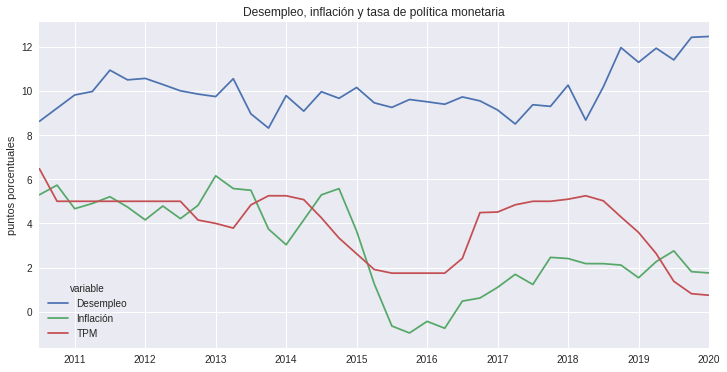

In [2]:
variables = {'22796':'Desempleo', '25485':'Inflación', '3541':'TPM'}

datos = SW(variables, freq='Q', func=np.mean)['2010Q3':'2020Q1']
nombres = datos.columns

fig, ax = plt.subplots(figsize=[12, 6])
datos.plot(ax=ax)
ax.set(title='Desempleo, inflación y tasa de política monetaria',
       ylabel='puntos porcentuales');

{badge}`Escogiendo número de rezagos,badge-primary`

El primer paso es escoger el número de rezagos $p$ del VAR:

In [3]:
model = VAR(datos)
model.select_order(4).summary()

,AIC,BIC,FPE,HQIC
0,1.778,1.912,5.920,1.824
1,-1.660,-1.127*,0.1907,-1.476
2,-1.832*,-0.8987,0.1628*,-1.510*
3,-1.649,-0.3163,0.2018,-1.189
4,-1.436,0.2972,0.2661,-0.8376


En este ejemplo escogeremos un solo rezago, en parte porque tenemos una muestra muy pequeña.

{badge}`Estimando el VAR,badge-primary`

In [4]:
res = model.fit(maxlags=1)
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Mar, 2021
Time:                     12:11:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.23433
Nobs:                     38.0000    HQIC:                  -1.56747
Log likelihood:          -116.481    FPE:                   0.173929
AIC:                     -1.75146    Det(Omega_mle):        0.128817
--------------------------------------------------------------------
Results for equation Desempleo
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                2.780812         1.652598            1.683           0.092
L1.Desempleo         0.731955         0.147283            4.970           0.000
L1.Inflación         0.004446         0.076407            0.

{badge}`Causalidad de Granger,badge-primary`

Al parecer, ninguna variable del sistema causa a otra en el sentido de Granger.

**Valores p de hipótesis de causalidad:**

In [5]:
granger = pd.DataFrame(
  [[res.test_causality(i, j).pvalue for i in nombres] for j in nombres],
  index = nombres,
  columns=nombres)
granger.index.name = 'Explicativa'
granger.columns.name = 'Dependiente'

granger.round(3)

Dependiente,Desempleo,Inflación,TPM
Dependiente,,,
Desempleo,0.000,0.153,0.135
Inflación,0.954,0.000,0.556
TPM,0.940,0.003,0.000


Esto no necesariamente implica que no haya relación de causalidad entre las variables: podría haber causalidad contemporánea.


{badge}`Funciones de impulso-respuesta con impulsos unitarios,badge-primary`

Funciones de impulso respuesta, con impulsos unitarios.

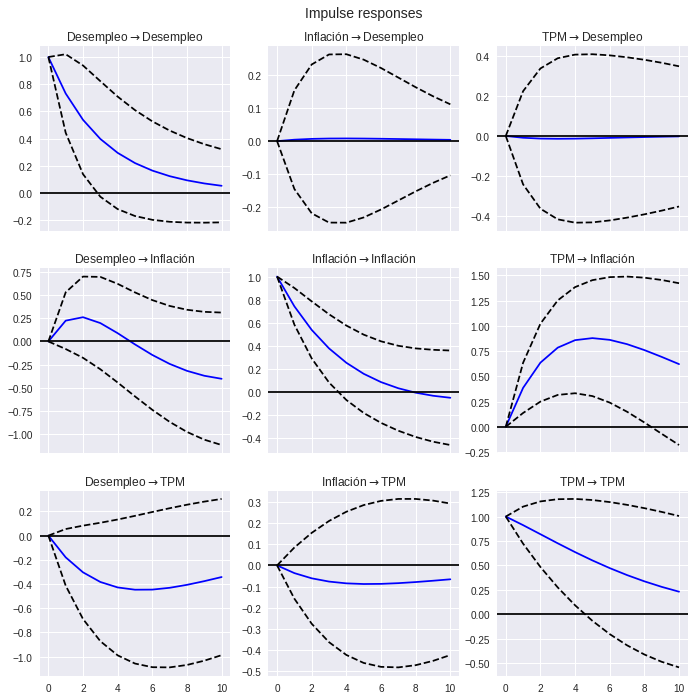

In [6]:
res.irf(10).plot(subplot_params={'figsize':[12,4]});

{badge}`Funciones de impulso-respuesta con impulsos ortogonales,badge-primary`

El resultado depende del ordenamiento de las variables en el sistema (Choleski).

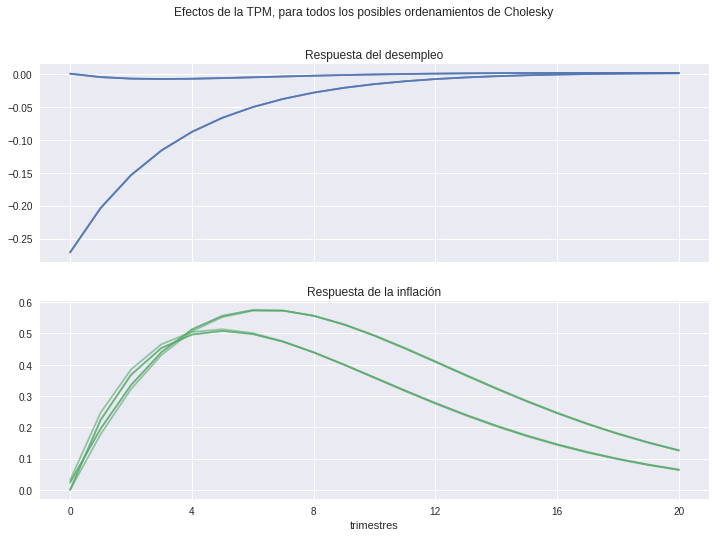

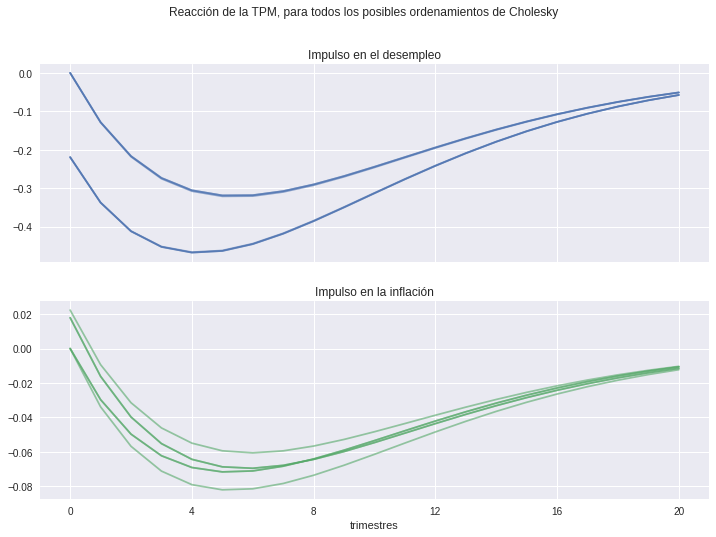

In [7]:
def respuesta_politica(orden, h=20):
    res = VAR(datos[[*orden]]).fit(1)
    irfs = pd.DataFrame(res.irf(h).orth_irfs.reshape(h+1,-1),
                        columns = pd.MultiIndex.from_product(
                            [orden, orden],
                            names=['Respuesta', 'Impulso']
                        )
                       )

    series = ['Desempleo', 'Inflación']                   
    efectos = irfs.xs('TPM', level='Impulso', axis=1)[series]
    reacciones = irfs.xs('TPM', level='Respuesta', axis=1)[series]
    return efectos, reacciones

fig1, axs1 = plt.subplots(2,1, figsize=[12,8], sharex=True)
fig1.suptitle('Efectos de la TPM, para todos los posibles ordenamientos de Cholesky')   

fig2, axs2 = plt.subplots(2,1, figsize=[12,8], sharex=True)
fig2.suptitle('Reacción de la TPM, para todos los posibles ordenamientos de Cholesky')   


for orden in permutations(nombres):
    efectos, reacciones = respuesta_politica(orden)
    efectos.plot(subplots=True, ax=axs1, legend=False, alpha=0.6)
    reacciones.plot(subplots=True, ax=axs2, legend=False, alpha=0.6)

axs1[0].set(title='Respuesta del desempleo')
axs1[1].set(title='Respuesta de la inflación',
           xlabel='trimestres',
           xticks=np.arange(0,21,4));

axs2[0].set(title='Impulso en el desempleo')
axs2[1].set(title='Impulso en la inflación',
          xlabel='trimestres',
          xticks=np.arange(0,21,4));

{badge}`Pronosticando con el VAR,badge-primary`

En un VAR estacionario, los pronósticos siempre convergen a la media de largo plazo de cada variable:
\begin{equation*}
\mu = \left(I - \Phi_1 - \Phi_2 \dots - \Phi_p\right)^{-1}c
\end{equation*}

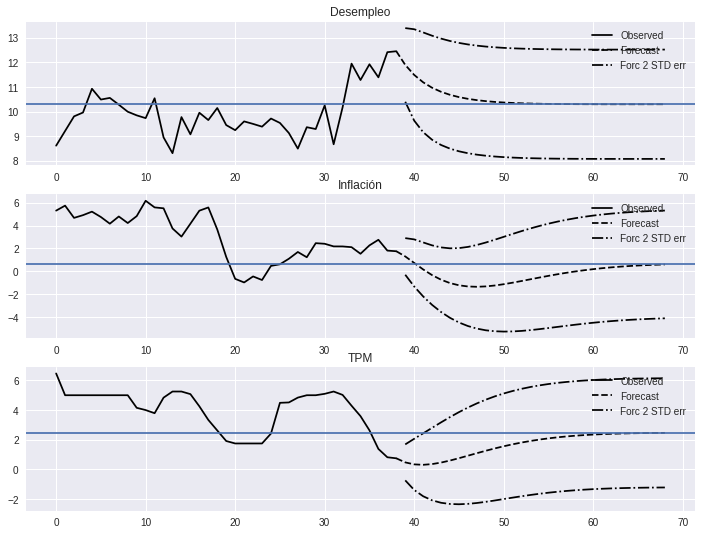

In [8]:
fig = res.plot_forecast(30);
fig.set_size_inches([12,9])

𝜇 = np.linalg.solve(np.eye(3) - res.coefs.sum(axis=0), res.intercept)
for ax, v in zip(fig.get_axes(), 𝜇):
    ax.axhline(v)

```{warning}
El valor de $\mu$ no coincide necesariamente con el promedio simple de los datos.
```

In [9]:
pd.DataFrame({'𝜇':𝜇, 'Promedio datos': datos.mean()})  

,𝜇,Promedio datos
Dependiente,,
Desempleo,10.303157,9.978157
Inflación,0.693666,2.983095
TPM,2.463701,3.924304


{badge}`Descomposición de la varianza de pronóstico,badge-primary`

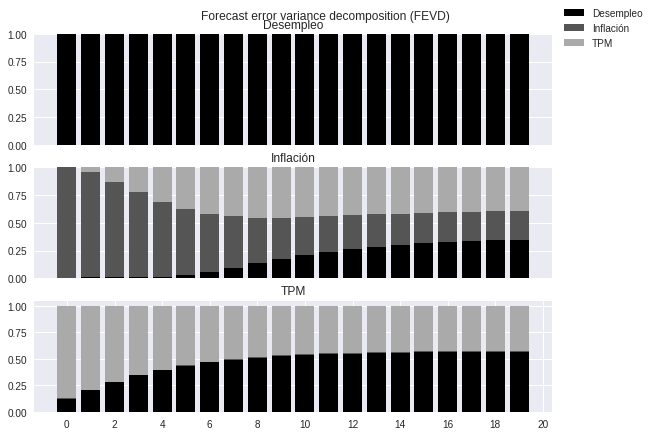

In [10]:
fig=res.fevd(20).plot(figsize=[9,6]);
fig.axes[0].set(xticks=[])
fig.axes[1].set(xticks=[])
fig.axes[2].set(xticks=np.arange(0,21,2))
for ax in fig.axes:
    ax.set(yticks=[0,0.25,0.5,0.75,1.0])

{{ termina_ejemplo }}